<a href="https://colab.research.google.com/github/riccomoura/BikeSharing/blob/main/bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Share System**

##***Operação***

O sistema de bike sharing se traduz por aluguel de bicicletas onde o processo de obtenção da assinatura, aluguel e devolução é automatizado através de uma rede de quiosques localizados em diversos pontos de uma cidade.

## ***Conceito***

Utilizando esse sistema, pessoas estão aptas a alugar uma bicicleta a partir de um local e devolvê-las à diferentes locais que necessariamente servem como bases.

##***Dados***

Os dados gerados por esses sistemas os tornam atraentes para pesquisadores por causa da duração de uma viagem, local de partida, local de entrega e o tempo consumido que é explícitamente registrado. Portanto, o sistema de Bike Sharing (compartilhamento de bicicletas) tem por função a uma rede sensorial que pode ser usada para estudar as condições de mobilidade de uma cidade. 

##***Objetivo do teste***



*   Análise exploratória dos dados obtidos através dos arquivos CSV;
*   Exibir gráficos com padrões de consumo;
*   Mostrar correlações de dados como condições climáticas e padrões no histórico de uso das bicicletas a partir das variáveis;
*   Extra: criar um modelo preditivo para calcular a demanda do serviço afim de sugerir tomada de decisões a cerca do modelo de negócio e sua expansão ou retração futura.

##***Progressão do desenvolvimento***

*   Etapa 1: Exibição de Dados
*   Etapa 2: Análise e Correlação
*   Etapa 3: Exibição de gráficos
*   Etapa 4: Conclusões finais ou Modelo Preditivo







# **Etapa 1 - Exibição de Dados**

*   ***Importar base de dados***
*   ***Concluir premissas básicas***



### ***Exibindo dados***

In [41]:
import pandas as pd

**Tabela Test**

6493 entradas e 9 colunas:


*   Index
*   Datetime
*   Season
*   Holiday
*   Working Day
*   Temp
*   aTemp
*   Humidity
*   Windspeed



In [ ]:
tabela_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
display(tabela_test)



**Tabela Train**

10886 entradas e 12 colunas:


*   Index
*   Datetime
*   Season
*   Holiday
*   Working Day
*   Temp
*   aTemp
*   Humidity
*   Windspeed
*   Casual
*   Registered
*   Count

In [ ]:
tabela_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
display(tabela_train)

### ***Premissas***

*   Tabela test (dados de teste);
*   Tabela train (dados de treinamento);
*   Coleção de dados ao longo de 2 anos;
*   Estações do ano representadas por números (1 = primavera, 2 = verão, 3 = outono, 4 = inverno);
*   Testes unificados em 1 única estação do ano;
*   Treinos separados em 4 estações do ano;
*   Período de Jan/2011 a Dez/2012.



# **Etapa 2 - Analisando e correlacionando dados**

***Exemplo de dado obtido e manipulado em ambos bancos de dados importados***

Média da velocidade do vento no período de coleta de dados da plataforma.

***Tabela Test***


In [ ]:
windspeed_mean = tabela_test["windspeed"].mean()
print('A velocidade média do vento no período de testes foi de: {:.2f}m/s'.format(windspeed_mean))

***Tabela Train***

In [138]:
windspeed_mean = tabela_train["windspeed"].mean()
print('A velocidade média do vento no período de treinos foi de: {:.2f}m/s'.format(windspeed_mean))

A velocidade média do vento no período de treinos foi de: 12.80m/s


### **Métricas de locação**




*   Total de locações




In [241]:
count_total = tabela_train["count"].sum()
print('Total de vezes que as bicicletas foram utilizadas em \ntodas as estações foi de: {}'.format(count_total))

Total de vezes que as bicicletas foram utilizadas em 
todas as estações foi de: 2085476


*   Locações de assinantes

In [240]:
registered_total = tabela_train["registered"].sum()
print('Total de locações realizadas por assinantes recorrentes do serviço em \ntodas as estações foi de: {}'.format(registered_total))

Total de locações realizadas por assinantes recorrentes do serviço em 
todas as estações foi de: 1693341


*   Locações casuais (não-assinantes)

In [242]:
casual_total = tabela_train["casual"].sum()
print('Total de locações realizadas por não-assinantes em \ntodas as estações foi de: {}'.format(casual_total))

Total de locações realizadas por não-assinantes em 
todas as estações foi de: 392135


### **Análise Top -> Down**

***Correlação entre o número total de locações realizadas e a estação do ano***

*   Locações totais por estação

In [238]:
count_per_season = tabela_train[["season", "count"]].groupby("season").sum()
display(count_per_season)

,count
season,
1,312498
2,588282
3,640662
4,544034


# **Etapa 3 - Exibição de gráficos**

### Importando matplotlib para exibição de gráficos

In [203]:
# importando matplotlib
import matplotlib.pyplot as plt



### Criando um novo dataframe a partir da Tabela Train

In [185]:
total_registers = tabela_train[['season', 'casual', 'registered', 'count']].groupby('season').sum()
display(total_registers)

,casual,registered,count
season,,,
1,41605,270893,312498
2,129672,458610,588282
3,142718,497944,640662
4,78140,465894,544034


### Criando o gráfico a partir do novo dataframe


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



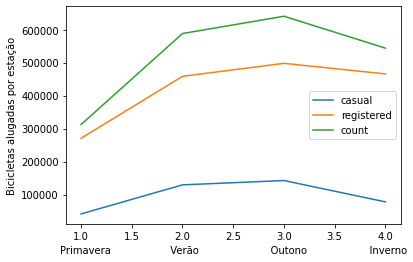

In [282]:
df = total_registers.groupby('season')['casual', 'registered', 'count'].sum().plot(kind='line', legend='Reverse')
plt.xlabel('Primavera                   Verão                       Outono                    Inverno')
plt.ylabel('Bicicletas alugadas por estação')

plt.show()

# **Etapa 4 - Conclusões finais**



*   1 - Durante as estações mais quentes e secas há substancial aumento da demanda;
*   2 - Sugere-se maior empenho no marketing com foco em fidelização.

